<a href="https://colab.research.google.com/github/ask4semoy/tests/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [5]:
missing_percentage = (titanic.isnull().sum() * 100 / len(titanic)).round(2)

print(missing_percentage)

survived        0.00
pclass          0.00
sex             0.00
age            19.87
sibsp           0.00
parch           0.00
fare            0.00
embarked        0.22
class           0.00
who             0.00
adult_male      0.00
deck           77.22
embark_town     0.22
alive           0.00
alone           0.00
dtype: float64


In [6]:
titanic_cleaned = titanic.dropna()

print("Original DataFrame shape:", titanic.shape)
print("Cleaned DataFrame shape:", titanic_cleaned.shape)

print("\nMissing values in cleaned DataFrame:")
print(titanic_cleaned.isnull().sum())

print(titanic_cleaned.head())

Original DataFrame shape: (891, 15)
Cleaned DataFrame shape: (182, 15)

Missing values in cleaned DataFrame:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1          1       1  female  38.0      1      0  71.2833        C  First   
3          1       1  female  35.0      1      0  53.1000        S  First   
6          0       1    male  54.0      0      0  51.8625        S  First   
10         1       3  female   4.0      1      1  16.7000        S  Third   
11         1       1  female  58.0      0      0  26.5500        S  First   

      who  adult_male deck  embark_town alive  alone  
1   woman       False    C    Cherbourg   yes  False  
3   woman       False    C  Southampton   yes  Fal

In [7]:
# Summary statistics for numerical columns in the cleaned DataFrame
numerical_summary = titanic_cleaned.describe()

# Summary statistics for categorical columns in the cleaned DataFrame
categorical_summary = titanic_cleaned.describe(include=['O'])

# Print the summaries
print("Numerical Summary (after dropping missing values):")
print(numerical_summary)

print("\nCategorical Summary (after dropping missing values):")
print(categorical_summary)

Numerical Summary (after dropping missing values):
         survived      pclass         age       sibsp       parch        fare
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000
mean     0.675824    1.192308   35.623187    0.467033    0.478022   78.919735
std      0.469357    0.516411   15.671615    0.645007    0.755869   76.490774
min      0.000000    1.000000    0.920000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   24.000000    0.000000    0.000000   29.700000
50%      1.000000    1.000000   36.000000    0.000000    0.000000   57.000000
75%      1.000000    1.000000   47.750000    1.000000    1.000000   90.000000
max      1.000000    3.000000   80.000000    3.000000    4.000000  512.329200

Categorical Summary (after dropping missing values):
         sex embarked  who  embark_town alive
count    182      182  182          182   182
unique     2        3    3            3     2
top     male        S  man  Southampton   yes
freq     

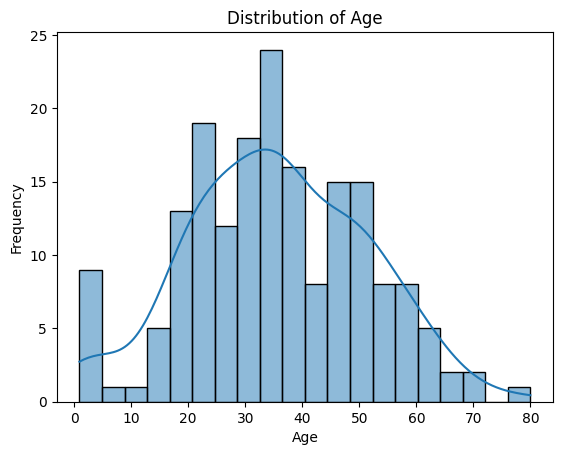

In [13]:
import matplotlib.pyplot as plt
sns.histplot(titanic_cleaned['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


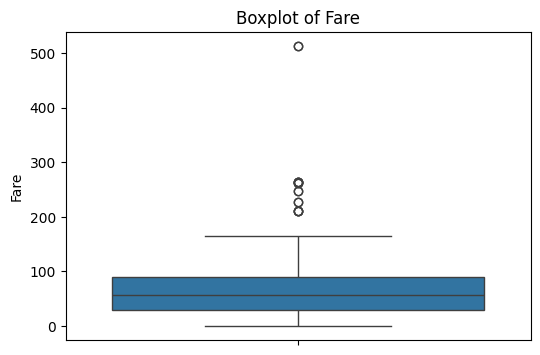

In [14]:
# Boxplot for 'fare'
plt.figure(figsize=(6, 4))
sns.boxplot(y=titanic_cleaned['fare'])
plt.title('Boxplot of Fare')
plt.ylabel('Fare')
plt.show()

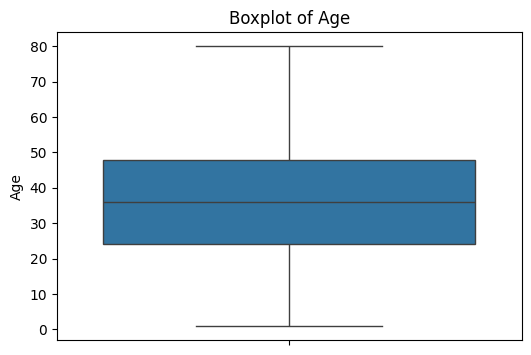

In [15]:
# Boxplot for 'age'
plt.figure(figsize=(6, 4))
sns.boxplot(y=titanic_cleaned['age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

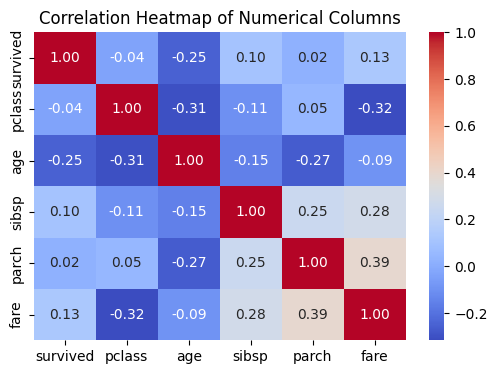

In [21]:
numerical_cols = titanic_cleaned.select_dtypes(include=['number'])
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

Average Fare by Class:
class
First     89.021975
Second    18.444447
Third     11.027500
Name: fare, dtype: float64


<ipython-input-22-eb7636461485>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_fare_by_class = titanic_cleaned.groupby('class')['fare'].mean()


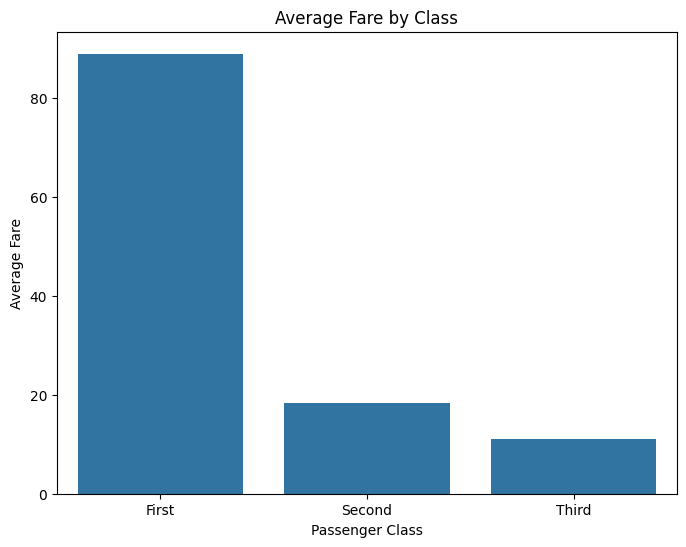

In [22]:
average_fare_by_class = titanic_cleaned.groupby('class')['fare'].mean()
print("Average Fare by Class:")
print(average_fare_by_class)

plt.figure(figsize=(8, 6))
sns.barplot(x=average_fare_by_class.index, y=average_fare_by_class.values)
plt.title('Average Fare by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.show()

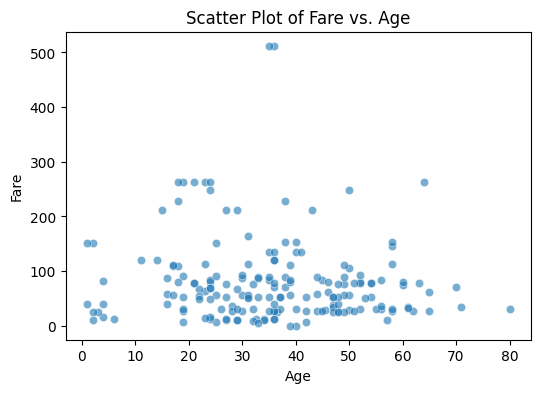

In [24]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='fare', data=titanic_cleaned, alpha=0.6)
plt.title('Scatter Plot of Fare vs. Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()